In [1]:
import json
import csv
import math
import numpy as np
import collections
import plotly.graph_objects as px
import plotly.express as plot
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import spatial

In [82]:
modelfile = open('modelresponsesNEW.json')
modeldata = json.load(modelfile)
modelfile.close()

behexptf = open('3dp3behavior.json')
behexpt = json.load(behexptf)
behexptf.close()

alexnetfile = open('alexnet.json')
alexnet = json.load(alexnetfile)
alexnetfile.close()

alexnetfile2 = open('alexnet_fc.json')
alexnet2 = json.load(alexnetfile2)
alexnetfile2.close()

In [85]:
alexnet = alexnet[0]
alexnet_fc = alexnet2[0]

In [4]:
def countModelAcc(modeldata):
    total_correct = 0
    allmodelvals = np.zeros((120))
    count = 1
    i = 0
    for id,acc in modeldata[0].items():
        total_correct += acc
        allmodelvals[int(id)-1] = acc
        
    return total_correct, allmodelvals

In [5]:
total_correct, allmodelresp = countModelAcc(modeldata)

In [6]:
print(allmodelresp)
print(total_correct)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
120


In [7]:
def getSubjectData(filename):
    with open(filename) as csvf:
        reader = csv.reader(csvf)
        subjects = {}
        i = 0
        for row in reader:
            if i == 0:
                names = [k for k in row]
                print(names)
            if i != 0:
                user_id = row[len(row)-1]
                if user_id != 'test':
                    if not user_id in subjects.keys():
                        subjects[user_id] = []
                    resp = {}
                    for j,val in enumerate(names):
                        resp[val] = row[j]
                    subjects[user_id].append(resp)
            i += 1
        return subjects
        csvf.close()

In [8]:
def matchSampleToID(samplename, expt):
    for trial in expt:
        if samplename != '':
            if trial['img_sample'] == ('./scenes' + samplename.split('.com')[1]):
                return trial['trialid'],trial['lure_type']

In [97]:
def preproccessSubjectData(filename):
    subjects = getSubjectData(filename)
    allsubjdata = []
    for subj, trials in subjects.items():
        subjdata = {}
        for trial in trials:
            if trial['img_sample'] != '':
                trialid,lure_type = matchSampleToID(trial['img_sample'], behexpt)
                trialdict = {}
                trialdict['correct'] = trial['correct']
                trialdict['img_target'] = trial['img_target']
                trialdict['img_lure'] = trial['img_target']
                trialdict['img_sample'] = trial['img_sample']
                trialdict['lure_type'] = lure_type
                subjdata[trialid] = trialdict
        allsubjdata.append(subjdata)
    return allsubjdata

In [105]:
allsubjdata = preproccessSubjectData('sceneGraph_classProject_data.csv')
allsubjdata2 = preproccessSubjectData('sceneGraph_classProject_exp2_data.csv')

evensubj = allsubjdata[::2]
oddsubj = allsubjdata[1::2]

['', '_id', 'choices', 'correct', 'correct_choice', 'expName', 'gameid', 'img_lure', 'img_sample', 'img_target', 'index', 'inputid', 'internal_node_id', 'iterationName', 'projName', 'response', 'rt', 'sessionID', 'stimulus', 'studyID', 'time_elapsed', 'trial_index', 'trial_type', 'userID']
['', '_id', 'choices', 'correct', 'correct_choice', 'expName', 'gameid', 'img_lure', 'img_sample', 'img_target', 'index', 'inputid', 'internal_node_id', 'iterationName', 'projName', 'response', 'rt', 'sessionID', 'stimulus', 'studyID', 'time_elapsed', 'trial_index', 'trial_type', 'userID']


In [11]:
def getCorrect(subjs):
    correct = np.zeros((120))
    for subj in subjs:
        for trial,vals in subj.items():
            if vals['correct'] == "True": correct[int(trial)-1] += 1
    return np.divide(correct,len(subjs))

def getCorrectFromInds(inds):
    correct = np.zeros((120))
    for ind in inds:
        for 
        for trial,vals in subj.items():
            if vals['correct'] == "True": correct[int(trial)-1] += 1
    return np.divide(correct,len(subjs))

In [12]:
print(getCorrect(evensubj).shape)

(120,)


In [107]:
# Put all this in a loop
# np.arange(0,31) -- make a list of indices
# np.rand -- randomize list of indices
# batch 1 = first half
# batch 2 = second half 
# iterate thru + avg final vector 

# all_corrs = np.zeros((1000))
# for i in range(10):
#     ind = np.arange(0,31)
#     np.random.shuffle(ind)
#     evensubj = ind[::2]
#     oddsubj = ind[1::2]
#     all_corrs[i] = np.corrcoef(getCorrect(evensubj),getCorrect(oddsubj))[0][1]

# avg_corr = np.mean(all_corrs)
# even_acc = getCorrect(evensubj)
# odd_acc = getCorrect(oddsubj)

# splithalf = np.corrcoef(even_acc,odd_acc)[0][1]
# print(splithalf)

In [14]:
def getCorrectByLureCond(subjs):
    allLureTypes = np.zeros((len(subjs),120))
    for i,subj in enumerate(subjs):
        count = 0
        for trial,vals in subj.items():
            if count == 30:
                count = 0
            if vals['correct'] == 'True':
                allLureTypes[i,int(trial)-1] = 1
            count += 1
    return allLureTypes

In [110]:
all_lure_conds = getCorrectByLureCond(allsubjdata)
subjavg = np.mean(all_lure_conds,axis=0)
print(len(subjavg))
subj_bylure = np.reshape(subjavg,(4,30))
subjavg_bylure = np.mean(subj_bylure,axis=1)
print(subjavg_bylure)

# all_lure_conds2 = getCorrectByLureCond(allsubjdata2)
# subjavg2 = np.mean(all_lure_conds2,axis=0)
# print(len(subjavg2))
# subj_bylure2 = np.reshape(subjavg2,(4,30))
# subjavg_bylure2 = np.mean(subj_bylure2,axis=1)
# print(subjavg_bylure2)

120
[0.77849462 0.90215054 0.99139785 0.99677419]


In [16]:
all_lure_conds = getCorrectByLureCond(allsubjdata)
even_lures = np.reshape(all_lure_conds[:16],(16,4,30))
odd_lures = np.reshape(all_lure_conds[16:(len(all_lure_conds))],(15,4,30))

even_avgs = np.mean(even_lures,axis=0)
odd_avgs = np.mean(odd_lures,axis=0)
print(even_avgs.shape)

splithalf_lures = []
for i,lure_cond in enumerate(even_avgs):
    splithalf_lures.append(np.corrcoef(lure_cond,odd_avgs[i])[0,1])
print(splithalf_lures)

(4, 30)
[0.5130029747623861, 0.8198170971904425, 0.1490711984999861, -0.04962916669854647]


   0         1
0  1  0.778495
1  2  0.902151
2  3  0.991398
3  4  0.996774


Text(0, 0.5, 'Subject Accuracy')

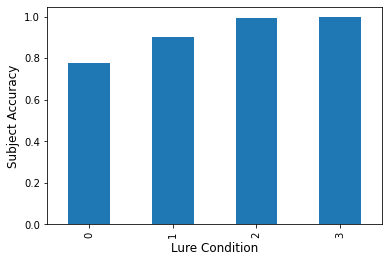

In [17]:
all_lure_conds = getCorrectByLureCond(allsubjdata)
lurecond_avgs = zip(["1","2","3","4"],subjavg_bylure)
df = pd.DataFrame(lurecond_avgs)
print(df)
# fig = plot.bar(df,x=0,y=1,labels={'0': 'Lure Condition','1': "Subject Accuracy"})
# fig.show()
fig = df.plot(kind='bar',legend=False)
fig.set_xlabel("Lure Condition", fontsize=12)
fig.set_ylabel("Subject Accuracy", fontsize=12)

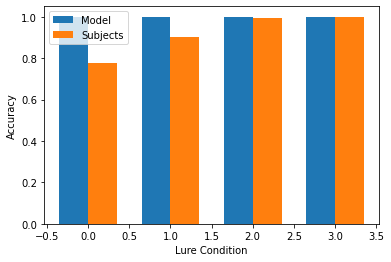

In [18]:
modelresp_bylure = np.reshape(allmodelresp,(4,30))
modellureconds = np.mean(modelresp_bylure,axis=1)
fig, ax = plt.subplots()
labels = ['1', '2', '3', '4']
width = 0.35
x = np.arange(len(labels))
rects1 = ax.bar(x - width/2, modellureconds, width, label='Model')
rects2 = ax.bar(x + width/2, subjavg_bylure, width, label='Subjects')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Lure Condition')
ax.legend()

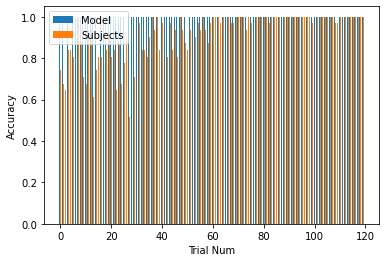

In [19]:
fig, ax = plt.subplots()
labels = [str(x) for x in range(120)]
x = np.arange(len(labels))
width = 0.35
rects1 = ax.bar(x - width/2, allmodelresp, width, label='Model')
rects2 = ax.bar(x + width/2, subjavg, width, label='Subjects')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Trial Num')
ax.legend()

In [20]:
for i,x in enumerate(allmodelresp):
    if x == 0:
        print("Trial num " + str(i))
        print("Subject Avg " + str(subjavg[i]))
        print("\n")

In [21]:
def matchImgToTrial(imgname, expt):
    alexnetactivs = {}
    for i in range(120):
        alexnetactivs[str(i)] = [[],[],[]]
    for trial in expt:
        print(trial)
        if imgname != '':
            if trial['img_sample'] == imgname:
                alexnetactivs[trial['trialid']][0].append()

In [83]:
def getCNNActivs(alexnet):
    alexnetactivs = {}
    alexnetlures = {}
    for i in range(120):
        alexnetactivs[str(i+1)] = [[],[],[]]
    for i in range(4):
        alexnetlures[str(i+1)] = [[],[],[]]

    for k,v in alexnet.items():
        for trial in behexpt:
            if k != '':
                if trial['img_sample'].split('/')[2:5] == k.split('/')[6:9]:
                    alexnetactivs[trial['trialid']][0].append(v)
                    alexnetlures[trial['lure_type']].append(v)
                elif trial['img_target'].split('/')[2:5] == k.split('/')[6:9]:
                    alexnetactivs[trial['trialid']][1].append(v)
                    alexnetlures[trial['lure_type']].append(v)
                elif trial['img_lure'].split('/')[2:5] == k.split('/')[6:9]:
                    alexnetactivs[trial['trialid']][2].append(v)
                    alexnetlures[trial['lure_type']].append(v)
    
    return alexnetactivs,alexnetlures

In [86]:
alexnetactivs,alexnetlures = getCNNActivs(alexnet)
alexnetactivs_fc,alexnetlures_fc = getCNNActivs(alexnet_fc)

In [87]:
def getCNNAcc(alexnetactivs):
    correcttrials_cnn = {}
    cnnmat = np.zeros((120))
    for trialnum, imgs in alexnetactivs.items():
        sample = np.array(imgs[0]).squeeze()
        target = np.array(imgs[1]).squeeze()
        lure = np.array(imgs[2]).squeeze()

        correct = np.corrcoef(sample,target)[0,1]
        incorrect = np.corrcoef(sample,lure)[0,1]

        if correct > incorrect:
            correcttrials_cnn[trialnum] = 1
            cnnmat[int(trialnum)-1] = 1
        else:
            correcttrials_cnn[trialnum] = 0
            cnnmat[int(trialnum)-1] = 0
    return correcttrials_cnn,cnnmat

correcttrials_cnn,cnnmat = getCNNAcc(alexnetactivs)
correcttrials_cnnfc,cnnmat_fc = getCNNAcc(alexnetactivs_fc)
# for trial in behexpt:
#     print(trial['trialid'] + ": " + trial['lure_type']) 

Text(0, 0.5, 'AlexNet Accuracy')

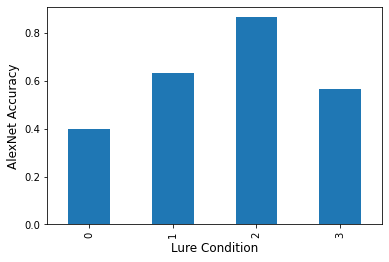

In [69]:
corrs = np.array(list(correcttrials_cnn.values()))
alexnetavg = np.mean(corrs)
cnnlures = np.mean(np.reshape(cnnmat, (4,30)),axis=1)

cnnlures_z = zip(["1","2","3","4"],cnnlures)
df = pd.DataFrame(cnnlures_z)
fig = df.plot(kind='bar',legend=False)
fig.set_xlabel("Lure Condition", fontsize=12)
fig.set_ylabel("AlexNet Accuracy", fontsize=12)

Text(0.5, 1.0, 'AlexNet Accuracy')

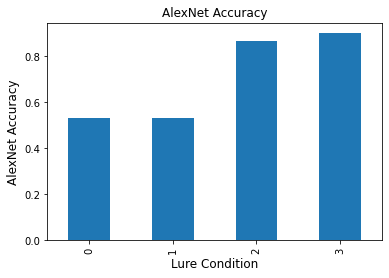

In [111]:
corrs_fc = np.array(list(correcttrials_cnnfc.values()))
alexnetavgfc = np.mean(corrs_fc)
alexnet_fclures = np.mean(np.reshape(cnnmat_fc, (4,30)),axis=1)

cnnlures_z = zip(["1","2","3","4"],cnnluresfc)
df = pd.DataFrame(cnnlures_z)
fig = df.plot(kind='bar',legend=False)
fig.set_xlabel("Lure Condition", fontsize=12)
fig.set_ylabel("AlexNet Accuracy", fontsize=12)
fig.set_title("AlexNet Accuracy")

In [92]:
# AlexNet CNN avg 
print(alexnetavg)
print(alexnetavgfc)
print(alexnet_fclures)

0.6166666666666667
0.7083333333333334
[0.53333333 0.53333333 0.86666667 0.9       ]


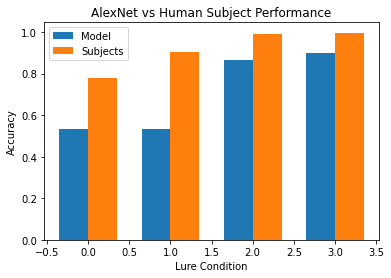

In [93]:
fig, ax = plt.subplots()
labels = ['1', '2', '3', '4']
width = 0.35
x = np.arange(len(labels))
rects1 = ax.bar(x - width/2, alexnet_fclures, width, label='Model')
rects2 = ax.bar(x + width/2, subjavg_bylure, width, label='Subjects')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Lure Condition')
ax.set_title('AlexNet vs Human Subject Performance')
ax.legend()

In [109]:
avg = subjavg.squeeze()
totalsubjavg = 0

for i,a in enumerate(avg):
#     print(str(i) + ": " + str(a))
    totalsubjavg += a 

totalsubjavg /= 120
print("Avg Subj Accuracy: " + str(totalsubjavg))
print("AlexNet Penultimate Layer Accuracy: " + str(alexnetavgfc))
print("3DP3 Accuracy: " + str(total_correct / 120))

Avg Subj Accuracy: 0.917204301075269
AlexNet Penultimate Layer Accuracy: 0.7083333333333334
3DP3 Accuracy: 1.0
